In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
for col in train_df.columns:
    print(f"col name{col}: {train_df[col].unique().size}")

col namePassengerId: 8693
col nameHomePlanet: 4
col nameCryoSleep: 3
col nameCabin: 6561
col nameDestination: 4
col nameAge: 81
col nameVIP: 3
col nameRoomService: 1274
col nameFoodCourt: 1508
col nameShoppingMall: 1116
col nameSpa: 1328
col nameVRDeck: 1307
col nameName: 8474
col nameTransported: 2


In [4]:
irrelevant_cols = ["PassengerId", "Name", "Cabin"]
train_df.drop(columns = irrelevant_cols, axis = 1, inplace = True)


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_df["Transported"])
train_df["Transported"] = le.transform(train_df["Transported"])

In [6]:
num_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
cat_cols = ['HomePlanet', "CryoSleep", "Destination", "VIP"]


In [7]:
log_cols = []
for col in num_cols:
    if col == "Age": continue
    log_col = "log_" + col
    train_df[log_col] = train_df[col].apply(lambda x: np.log(x + 1))
    log_cols.append(log_col)

In [8]:
train_df.describe()
num_cols += log_cols

<Axes: xlabel='Age', ylabel='RoomService'>

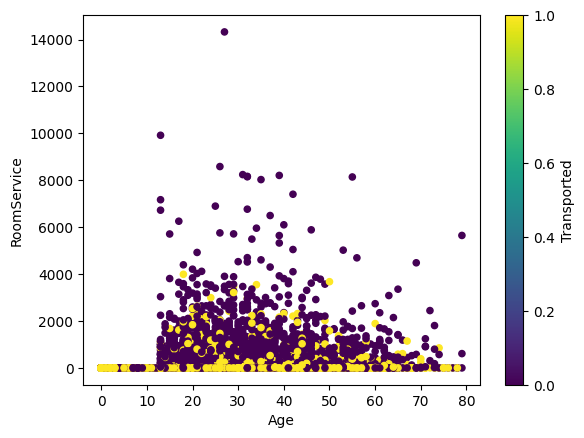

In [9]:
train_df.plot(kind ="scatter" , x = "Age", y = "RoomService", c = "Transported", cmap = "viridis" )

In [117]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(num_cols), len(num_cols))
for i, coli in enumerate(num_cols):
    for j, colj in enumerate(num_cols[i+1:]):
        axs[i, j] = train_df.plot(kind ="scatter" , x =  coli, y = colj, c = "Transported", cmap = "viridis" )

plt.show()

/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


KeyboardInterrupt: 

In [118]:
train_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,log_RoomService,log_FoodCourt,log_ShoppingMall,log_Spa,log_VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,4.700480,2.302585,3.258097,6.309918,3.806662
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,3.784190,8.182280,0.000000,8.812248,3.912023
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0.000000,7.157735,5.918894,8.110728,5.267858
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,5.717028,4.262680,5.023881,6.338594,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,0,0.000000,8.827615,0.000000,7.404888,4.317488
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,1,0.000000,0.000000,7.535297,0.693147,0.000000
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,0,0.000000,6.956545,0.000000,5.869297,8.082093


In [10]:
from sklearn.impute import SimpleImputer
for col in train_df.columns:
    strategy = "most_frequent" if col in cat_cols else "median"
    sim = SimpleImputer(strategy=strategy)
    res = sim.fit_transform(train_df[col].to_numpy().reshape(-1, 1))
    res = pd.DataFrame(res, columns = [col])
    train_df = pd.concat([train_df.drop(columns = [col], axis = 1), res], axis = 1)


In [11]:
from sklearn.preprocessing import OneHotEncoder
for col in cat_cols:
    ohe = OneHotEncoder()
    res = ohe.fit_transform(train_df[col].to_numpy().reshape(-1, 1))
    res = pd.DataFrame(res.todense(), columns = ohe.get_feature_names_out(input_features = [col]))
    train_df = pd.concat([train_df.drop(columns = [col], axis = 1), res], axis = 1)
    

In [12]:
train_df.corr()["Transported"]

Age                         -0.074233
RoomService                 -0.241124
FoodCourt                    0.045583
ShoppingMall                 0.009391
Spa                         -0.218545
VRDeck                      -0.204874
Transported                  1.000000
log_RoomService             -0.356220
log_FoodCourt               -0.135029
log_ShoppingMall            -0.178536
log_Spa                     -0.361903
log_VRDeck                  -0.338688
HomePlanet_Earth            -0.168845
HomePlanet_Europa            0.176916
HomePlanet_Mars              0.019544
CryoSleep_False             -0.460132
CryoSleep_True               0.460132
Destination_55 Cancri e      0.108722
Destination_PSO J318.5-22    0.000092
Destination_TRAPPIST-1e     -0.096319
VIP_False                    0.037261
VIP_True                    -0.037261
Name: Transported, dtype: float64

In [13]:
train_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,log_RoomService,log_FoodCourt,log_ShoppingMall,...,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,4.700480,2.302585,3.258097,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,3.784190,8.182280,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.000000,7.157735,5.918894,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,5.717028,4.262680,5.023881,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [14]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,log_RoomService,log_FoodCourt,log_ShoppingMall,...,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,...,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820,0.503624,1.735295,1.906543,1.599415,...,0.552514,0.245140,0.202347,0.650638,0.349362,0.207063,0.091568,0.701369,0.977108,0.022892
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417,0.500016,2.719285,2.932951,2.567446,...,0.497263,0.430195,0.401772,0.476796,0.476796,0.405224,0.288432,0.457684,0.149568,0.149568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,1.000000,3.737670,4.127134,3.135494,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,9.569971,10.302733,10.064458,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
train_df_pca = pca.fit_transform(X = train_df.drop(columns =["Transported"], axis = 1), y = train_df['Transported'])
train_df_pca = pd.DataFrame(train_df_pca, columns = pca.get_feature_names_out(input_features = train_df.drop(columns =["Transported"], axis = 1).columns))
train_df_pca = pd.concat([train_df_pca, train_df['Transported']], axis = 1)

In [36]:
train_df_pca.corr()["Transported"]

pca0          -0.039115
pca1          -0.306582
pca2          -0.028480
pca3          -0.228964
pca4           0.077558
pca5          -0.032061
pca6           0.362363
pca7           0.118804
pca8           0.045053
pca9           0.114976
Transported    1.000000
Name: Transported, dtype: float64

array([[<Axes: xlabel='pca0', ylabel='pca0'>,
        <Axes: xlabel='pca1', ylabel='pca0'>,
        <Axes: xlabel='pca2', ylabel='pca0'>,
        <Axes: xlabel='pca3', ylabel='pca0'>,
        <Axes: xlabel='pca4', ylabel='pca0'>,
        <Axes: xlabel='pca5', ylabel='pca0'>,
        <Axes: xlabel='pca6', ylabel='pca0'>,
        <Axes: xlabel='pca7', ylabel='pca0'>,
        <Axes: xlabel='pca8', ylabel='pca0'>,
        <Axes: xlabel='pca9', ylabel='pca0'>,
        <Axes: xlabel='Transported', ylabel='pca0'>],
       [<Axes: xlabel='pca0', ylabel='pca1'>,
        <Axes: xlabel='pca1', ylabel='pca1'>,
        <Axes: xlabel='pca2', ylabel='pca1'>,
        <Axes: xlabel='pca3', ylabel='pca1'>,
        <Axes: xlabel='pca4', ylabel='pca1'>,
        <Axes: xlabel='pca5', ylabel='pca1'>,
        <Axes: xlabel='pca6', ylabel='pca1'>,
        <Axes: xlabel='pca7', ylabel='pca1'>,
        <Axes: xlabel='pca8', ylabel='pca1'>,
        <Axes: xlabel='pca9', ylabel='pca1'>,
        <Axes: xlabel='Tra

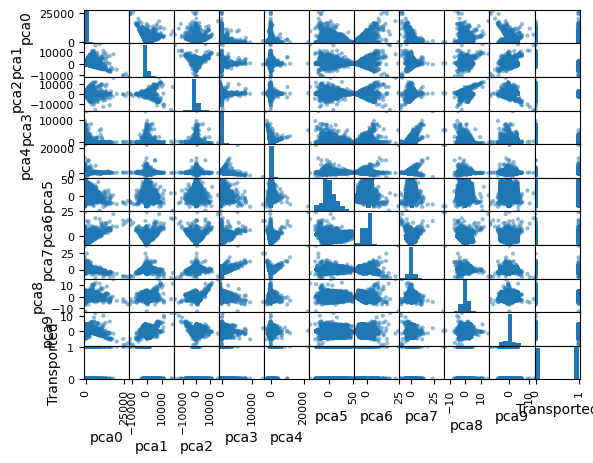

In [37]:
# train_df_pca.plot(kind ="scatter" , x = "pca0", y = "pca1", c = "Transported", cmap = "viridis", alpha = 0.1)
from pandas.plotting import scatter_matrix
scatter_matrix(train_df_pca)

In [39]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
clf = DecisionTreeClassifier(random_state= 42)
clf.fit(X = train_df_pca.drop(columns =["Transported"], axis = 1), y = train_df_pca['Transported'])

DecisionTreeClassifier(random_state=42)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

mp = {
    
    "random_forest": {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 20, 40, 80, 160],
            'max_depth': [1, 2, 4, 8, 16]
        },

    "xgb":{
        'model': XGBClassifier(),
        'params': {
            
        },
    },
    "svc": {
        'model': SVC(),
        'params': {
            'kernel': ['linear', 'rbf', 'poly'],
            'degree': [2, 3, 5],
            'gamma': [0.01, 0.1, 1, 2, 2.3],
            'coef0': [1, 2, 4, 8]
        }
    },

    "logistic": {
        'model':LogisticRegression(),
        'params': {
            'penality': ['l1', 'l2']
        }
    },
        
    }    
}

In [62]:
mp.items()

dict_items([('random_forest', {'model': RandomForestClassifier(), 'params': {'n_estimators': [10, 20, 40, 80, 160], 'max_depth': [1, 2, 4, 8, 16]}, 'xgb': {'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'params': {}}, 'svc': {'model': SVC(), 'params': {'kernel': ['linear', 'rbf'

In [71]:
X_train = train_df_pca.drop(columns = ['Transported'], axis = -1)
y_train = train_df_pca['Transported']
score = {}
for name, config in mp.items():
    print("training",  name)
    model = config['model']
    grid = config['params']
    search = GridSearchCV(estimator = model, param_grid = grid, cv = 3)
    search.fit(X_train, y_train)
    score[name] = {
        'score': search.best_score_,
        'best_params': search.best_params_,
    }
    print(f'training {name} done')

training random_forest
training random_forest done


In [69]:
score

{'random_forest': {'score': 0.7979991120646371,
  'best_params': {'max_depth': 8, 'n_estimators': 80}}}